## Exploratory Data Analysis (EDA) with Pandas

In [82]:
%load_ext sql
#https://www.kaggle.com/benhamner/sf-bay-area-bike-share

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [83]:
%sql sqlite:///bikeshare.db

'Connected: None@bikeshare.db'

In [84]:
trips_table = %sql SELECT * FROM trip;

Done.


In [85]:
import pandas as pd

In [86]:
trips = trips_table.DataFrame()

In [87]:
print (trips)

            id  duration       start_date  \
0         4069       174   8/29/2013 9:08   
1         4073      1067   8/29/2013 9:24   
2         4074      1131   8/29/2013 9:24   
3         4075      1117   8/29/2013 9:24   
4         4076      1118   8/29/2013 9:25   
5         4078      3829   8/29/2013 9:31   
6         4079       995   8/29/2013 9:35   
7         4080       764   8/29/2013 9:36   
8         4081       218   8/29/2013 9:38   
9         4084       287   8/29/2013 9:41   
10        4086       178   8/29/2013 9:42   
11        4100      1392   8/29/2013 9:57   
12        4116      1213  8/29/2013 10:11   
13        4121      1040  8/29/2013 10:13   
14        4123       500  8/29/2013 10:14   
15        4125       464  8/29/2013 10:14   
16        4130        71  8/29/2013 10:16   
17        4132      3637  8/29/2013 10:17   
18        4133      1965  8/29/2013 10:17   
19        4134       574  8/29/2013 10:19   
20        4135      3492  8/29/2013 10:19   
21        

In [89]:
import datetime as dt
trips.dtypes
trips['start_date'] = pd.to_datetime(trips['start_date'],infer_datetime_format=True)
trips['month'] = pd.DatetimeIndex(trips['start_date']).month
trips['dayofweek'] = pd.DatetimeIndex(trips['start_date']).day
trips['date'] = pd.DatetimeIndex(trips['start_date']).date
trips['hour'] = pd.DatetimeIndex(trips['start_date']).hour
trips['year'] = pd.DatetimeIndex(trips['start_date']).year
trips = trips[trips.year == 2013]
print (trips)

            id  duration          start_date  \
0         4069       174 2013-08-29 09:08:00   
1         4073      1067 2013-08-29 09:24:00   
2         4074      1131 2013-08-29 09:24:00   
3         4075      1117 2013-08-29 09:24:00   
4         4076      1118 2013-08-29 09:25:00   
5         4078      3829 2013-08-29 09:31:00   
6         4079       995 2013-08-29 09:35:00   
7         4080       764 2013-08-29 09:36:00   
8         4081       218 2013-08-29 09:38:00   
9         4084       287 2013-08-29 09:41:00   
10        4086       178 2013-08-29 09:42:00   
11        4100      1392 2013-08-29 09:57:00   
12        4116      1213 2013-08-29 10:11:00   
13        4121      1040 2013-08-29 10:13:00   
14        4123       500 2013-08-29 10:14:00   
15        4125       464 2013-08-29 10:14:00   
16        4130        71 2013-08-29 10:16:00   
17        4132      3637 2013-08-29 10:17:00   
18        4133      1965 2013-08-29 10:17:00   
19        4134       574 2013-08-29 10:1

In [90]:
riders_by_mont = trips.groupby(['month'])
#df = pd.DataFrame(riders_by_month['id'].count())
#print (df)
riders_per_month = trips['month'].value_counts()
df = pd.DataFrame(riders_per_month).sort_index()
df = df.reset_index()
df = df.rename(columns = {'index':'month', 'month':'number of riders'})
print (df)


   month  number of riders
0      8              2102
1      9             25243
2     10             29105
3     11             24219
4     12             19894


In [91]:
import seaborn as sns
import matplotlib as plt
%matplotlib inline

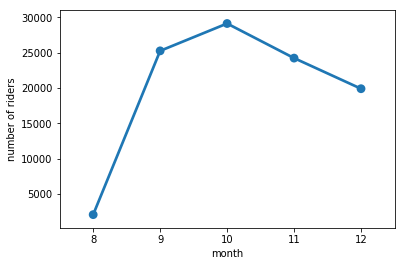

In [92]:
sns.pointplot(x='month', y='number of riders', data =df)

In [ ]:
trips.isnull().values.ravel().sum()

In [94]:
#df_sept_dec = df.iloc[8:12,:]
#print (df_sept_dec)
#riders_by_mont = trips.groupby(['month'])
df_trips_sep_dec = trips[(trips.month >= 9) & (trips.month <= 12)]
##date_index_df = pd.DataFrame(df_trips_sep_dec)
##date_index_df['date'] = pd.to_datetime(date_index_df.date)
##date_index_df= date_index_df.set_index(pd.DatetimeIndex(date_index_df['date']))
#print (date_index_df)
##date_index_df.resample("1d").sum().fillna(0).rolling(window=3, min_periods=1).mean()
#print (date_index_df)
day_count = df_trips_sep_dec["date"].value_counts()
#print (day_count)
df_trips_sep_dec_count_with_date = pd.DataFrame(day_count).sort_index()
#print (df3)
df_trips_sep_dec_count_with_date = df_trips_sep_dec_count_with_date.reset_index()
df_trips_sep_dec_count_with_date = df_trips_sep_dec_count_with_date.rename(columns = {'index':'date', 'date':'number of riders'})


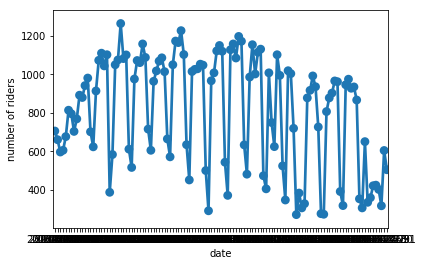

In [95]:
sns.pointplot(x='date', y='number of riders', data =df_trips_sep_dec_count_with_date)

In [98]:
from math import sqrt
import numpy as np
average_daily_trips = np.mean(df_trips_sep_dec_count_with_date['number of riders'])
print (average_daily_trips)
strd_dev_plus_1_5 = (average_daily_trips + 1.5 * df_trips_sep_dec_count_with_date['number of riders'].std())
print (strd_dev_plus_1_5)
strd_dev_minus_1_5 = (average_daily_trips - 1.5 * df_trips_sep_dec_count_with_date['number of riders'].std())
print (strd_dev_minus_1_5)

807.057377049
1238.25675996
375.857994141


Populating the interactive namespace from numpy and matplotlib


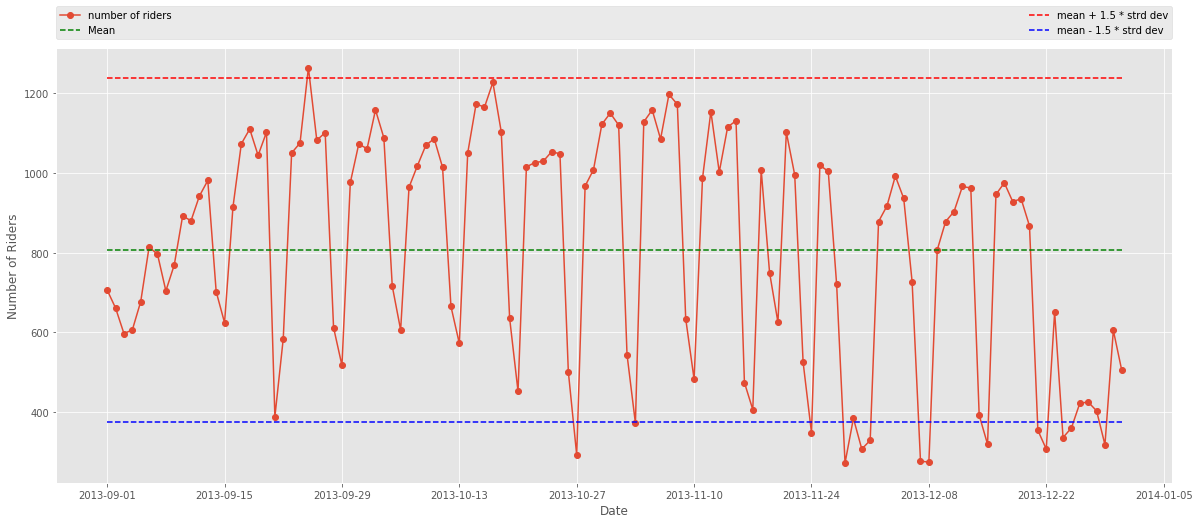

In [121]:
import matplotlib.pyplot as plt
%pylab inline
pylab.rcParams['figure.figsize'] = (20, 8)
matplotlib.style.use('ggplot')
fig,ax = plt.subplots()
data_line = ax.plot(df_trips_sep_dec_count_with_date['date'],df_trips_sep_dec_count_with_date['number of riders'], label='number of riders', marker='o')
mean_line = ax.plot(df_trips_sep_dec_count_with_date['date'],np.zeros_like(df_trips_sep_dec_count_with_date['date']) + average_daily_trips ,label='Mean', linestyle='--',color='g')
strd_above_line = ax.plot(df_trips_sep_dec_count_with_date['date'],np.zeros_like(df_trips_sep_dec_count_with_date['date']) + strd_dev_plus_1_5 ,label='mean + 1.5 * strd dev', linestyle='--', color='r')
strd_below_line = ax.plot(df_trips_sep_dec_count_with_date['date'],np.zeros_like(df_trips_sep_dec_count_with_date['date']) + strd_dev_minus_1_5 ,label='mean - 1.5 * strd dev', linestyle='--',color='b')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
plt.xlabel('Date')
plt.ylabel('Number of Riders')
plt.show()